# **Изначальный пример ("базовая нейросеть"):**

In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

#Загрузка и разбиение данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Модель MLP — многослойный перцептрон
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=500)
clf.fit(X_train, y_train)

#Отчёт о точности
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


--------------------------------------------------

# Для самостоятельного задания выбран "Inductive Clustering" из Clustering. Ниже непосредственный пример его реализации со scikit-learn


------------------------------------------------------------------

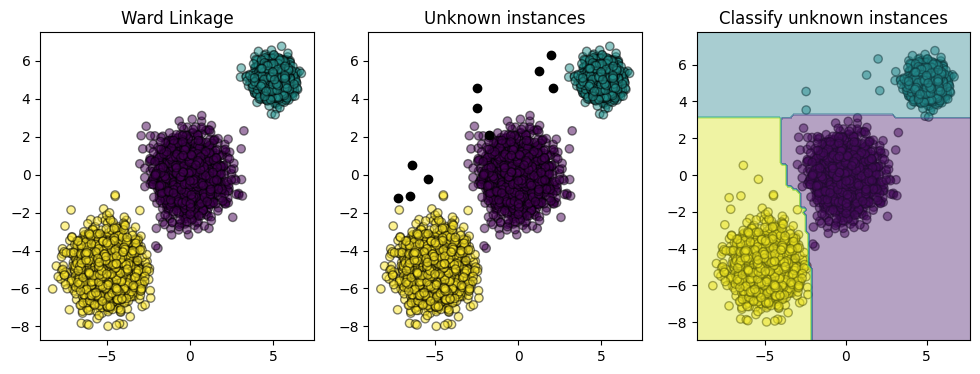

In [21]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, clone
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.utils.metaestimators import available_if
from sklearn.utils.validation import check_is_fitted

N_SAMPLES = 5000
RANDOM_STATE = 42


def _classifier_has(attr):
    """Check if we can delegate a method to the underlying classifier.

    First, we check the first fitted classifier if available, otherwise we
    check the unfitted classifier.
    """
    return lambda estimator: (
        hasattr(estimator.classifier_, attr)
        if hasattr(estimator, "classifier_")
        else hasattr(estimator.classifier, attr)
    )


class InductiveClusterer(BaseEstimator):
    def __init__(self, clusterer, classifier):
        self.clusterer = clusterer
        self.classifier = classifier

    def fit(self, X, y=None):
        self.clusterer_ = clone(self.clusterer)
        self.classifier_ = clone(self.classifier)
        y = self.clusterer_.fit_predict(X)
        self.classifier_.fit(X, y)
        return self

    @available_if(_classifier_has("predict"))
    def predict(self, X):
        check_is_fitted(self)
        return self.classifier_.predict(X)

    @available_if(_classifier_has("decision_function"))
    def decision_function(self, X):
        check_is_fitted(self)
        return self.classifier_.decision_function(X)


def plot_scatter(X, color, alpha=0.5):
    return plt.scatter(X[:, 0], X[:, 1], c=color, alpha=alpha, edgecolor="k")


# Generate some training data from clustering
X, y = make_blobs(
    n_samples=N_SAMPLES,
    cluster_std=[1.0, 1.0, 0.5],
    centers=[(-5, -5), (0, 0), (5, 5)],
    random_state=RANDOM_STATE,
)


# Train a clustering algorithm on the training data and get the cluster labels
clusterer = AgglomerativeClustering(n_clusters=3)
cluster_labels = clusterer.fit_predict(X)

plt.figure(figsize=(12, 4))

plt.subplot(131)
plot_scatter(X, cluster_labels)
plt.title("Ward Linkage")


# Generate new samples and plot them along with the original dataset
X_new, y_new = make_blobs(
    n_samples=10, centers=[(-7, -1), (-2, 4), (3, 6)], random_state=RANDOM_STATE
)

plt.subplot(132)
plot_scatter(X, cluster_labels)
plot_scatter(X_new, "black", 1)
plt.title("Unknown instances")


# Declare the inductive learning model that it will be used to
# predict cluster membership for unknown instances
classifier = RandomForestClassifier(random_state=RANDOM_STATE)
inductive_learner = InductiveClusterer(clusterer, classifier).fit(X)

probable_clusters = inductive_learner.predict(X_new)


ax = plt.subplot(133)
plot_scatter(X, cluster_labels)
plot_scatter(X_new, probable_clusters)

# Plotting decision regions
DecisionBoundaryDisplay.from_estimator(
    inductive_learner, X, response_method="predict", alpha=0.4, ax=ax
)
plt.title("Classify unknown instances")

plt.show()

# Теперь с этим алгоритмом используем синтетический датасет "make_classification" из generated datasets.

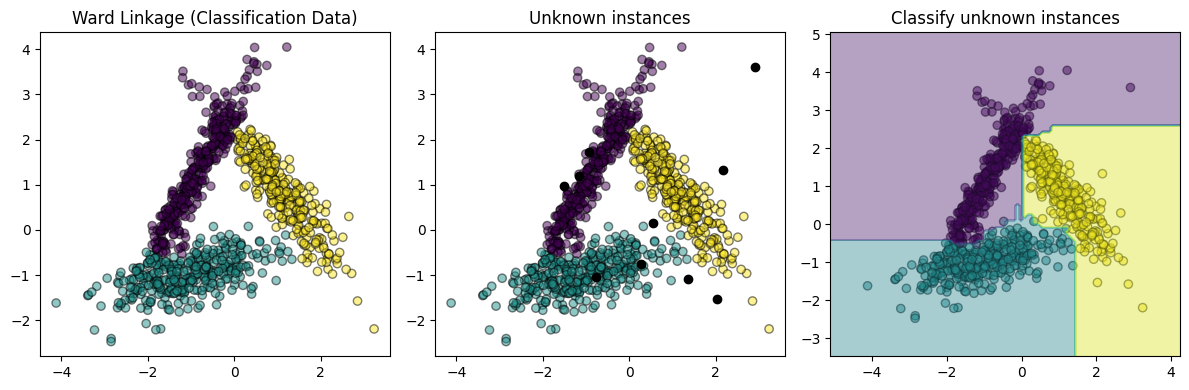

In [24]:
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, clone
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.utils.metaestimators import available_if
from sklearn.utils.validation import check_is_fitted

# Константы 
RANDOM_STATE = 42
N_SAMPLES = 1000

#  Вспомогательная функция для делегирования методов классификатора
def _classifier_has(attr):
    return lambda estimator: (
        hasattr(estimator.classifier_, attr)
        if hasattr(estimator, "classifier_")
        else hasattr(estimator.classifier, attr)
    )

# Класс индуктивного кластеризатора 
class InductiveClusterer(BaseEstimator):
    def __init__(self, clusterer, classifier):
        self.clusterer = clusterer
        self.classifier = classifier

    def fit(self, X, y=None):
        self.clusterer_ = clone(self.clusterer)
        self.classifier_ = clone(self.classifier)
        y = self.clusterer_.fit_predict(X)
        self.classifier_.fit(X, y)
        return self

    @available_if(_classifier_has("predict"))
    def predict(self, X):
        check_is_fitted(self)
        return self.classifier_.predict(X)

    @available_if(_classifier_has("decision_function"))
    def decision_function(self, X):
        check_is_fitted(self)
        return self.classifier_.decision_function(X)

#  Функция для отрисовки точек 
def plot_scatter(X, color, alpha=0.5):
    return plt.scatter(X[:, 0], X[:, 1], c=color, alpha=alpha, edgecolor="k")

#Генерация обучающих данных 
X, y = make_classification(
    n_samples=N_SAMPLES,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    n_classes=3,
    random_state=RANDOM_STATE,
)

# Кластеризация
clusterer = AgglomerativeClustering(n_clusters=3)
cluster_labels = clusterer.fit_predict(X)

# Визуализация кластеров 
plt.figure(figsize=(12, 4))
plt.subplot(131)
plot_scatter(X, cluster_labels)
plt.title("Ward Linkage (Classification Data)")

# Генерация новых (неизвестных) точек
X_new, _ = make_classification(
    n_samples=10,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    n_classes=3,
    random_state=RANDOM_STATE + 1,
)

# Визуализация известных и новых точек 
plt.subplot(132)
plot_scatter(X, cluster_labels)
plot_scatter(X_new, "black", 1)
plt.title("Unknown instances")

#  Индуктивное обучение 
classifier = RandomForestClassifier(random_state=RANDOM_STATE)
inductive_learner = InductiveClusterer(clusterer, classifier).fit(X)

#  Предсказание кластера для новых точек 
predicted_clusters = inductive_learner.predict(X_new)

#Визуализация предсказаний и границ 
ax = plt.subplot(133)
plot_scatter(X, cluster_labels)
plot_scatter(X_new, predicted_clusters)
DecisionBoundaryDisplay.from_estimator(
    inductive_learner, X, response_method="predict", alpha=0.4, ax=ax
)
plt.title("Classify unknown instances")

plt.tight_layout()
plt.show()

# **Распишем этот момент подробнее:**

**Цель задачи:**
Продемонстрировать применение метода Inductive Clustering — подхода, в котором результаты кластеризации используются для обучения классификатора, способного обобщать на новые данные.
Метод реализован как собственный класс InductiveClusterer на основе алгоритма кластеризации (например, здесь - AgglomerativeClustering) и классификатора (RandomForestClassifier) 

**Использовать** "Inductive Clustering" из раздела "Clustering"

**Протестировать** на двух типах данных:
    1)**Синтетический датасет**: `make_classification` с несколькими параметрами сложности, визуализированными на плоскости.
    2)**Реальный датасет**: "Credit-Card-Dataset-for-Clustering" (с openml.org) с поведенческими переменными клиентов кредитных карт.

**Проверить и визуализировать** результаты кластеризации, а затем — предсказания обученного классификатора на этих же данных.

**Интерпретировать**, насколько осмысленно алгоритм разделяет данные на группы, и оценить применимость модели к новым клиентам.

1. Импорт библиотек

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.base import BaseEstimator, clone
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.utils.metaestimators import available_if
from sklearn.utils.validation import check_is_fitted

3. Генерация синтетического датасета

X, y_true = make_classification(
    n_samples=5000,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    n_classes=3,
    random_state=42
)

plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap="viridis", alpha=0.6)
plt.title("Изначальный датасет make_classification (3 класса)")
plt.show()

3. Реализация InductiveClusterer

def _classifier_has(attr):
    return lambda estimator: (
        hasattr(estimator.classifier_, attr)
        if hasattr(estimator, "classifier_")
        else hasattr(estimator.classifier, attr)
    )

class InductiveClusterer(BaseEstimator):
    def __init__(self, clusterer, classifier):
        self.clusterer = clusterer
        self.classifier = classifier

    def fit(self, X, y=None):
        self.clusterer_ = clone(self.clusterer)
        self.classifier_ = clone(self.classifier)
        y = self.clusterer_.fit_predict(X)
        self.classifier_.fit(X, y)
        return self

    @available_if(_classifier_has("predict"))
    def predict(self, X):
        check_is_fitted(self)
        return self.classifier_.predict(X)

    @available_if(_classifier_has("decision_function"))
    def decision_function(self, X):
        check_is_fitted(self)
        return self.classifier_.decision_function(X)
        
4. Обучение кластеризатора и построение модели

#Кластеризация
clusterer = AgglomerativeClustering(n_clusters=3)
cluster_labels = clusterer.fit_predict(X)

#Обучение классификатора на метках кластеров
classifier = RandomForestClassifier(random_state=42)
model = InductiveClusterer(clusterer, classifier).fit(X)

5. Предсказание для новых данных

from sklearn.datasets import make_classification

X_new, _ = make_classification(
    n_samples=10,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    n_classes=3,
    random_state=1
)

y_pred = model.predict(X_new)

6. Визуализация результатов


fig, axs = plt.subplots(1, 3, figsize=(15, 4))

#Ward Linkage
axs[0].scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap="viridis", alpha=0.6, edgecolor="k")
axs[0].set_title("Ward Linkage")

#Unknown instances
axs[1].scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap="viridis", alpha=0.3)
axs[1].scatter(X_new[:, 0], X_new[:, 1], c="black", marker="x", s=80)
axs[1].set_title("Unknown instances")

#Classification result
axs[2].scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap="viridis", alpha=0.3)
axs[2].scatter(X_new[:, 0], X_new[:, 1], c=y_pred, cmap="viridis", edgecolor="k", marker="s", s=80)
DecisionBoundaryDisplay.from_estimator(model, X, response_method="predict", alpha=0.2, ax=axs[2])
axs[2].set_title("Predicted clusters for new data")

plt.tight_layout()
plt.show()

7. Интерпретация результатов
Что делает модель:
Алгоритм сначала проводит кластеризацию AgglomerativeClustering, получая метки (0, 1, 2).
Эти метки используются для обучения классификатора RandomForestClassifier.
Полученная модель позволяет "продлить" действие кластеризации на новые точки.

Плюсы:
Кластеризация становится "обучаемой" моделью, пригодной для новых данных.
Можно интерпретировать, какие признаки повлияли на попадание в тот или иной кластер (например, с помощью feature importance).

Вывод:
Метод Inductive Clustering полезен, когда:
кластеризация занимает много времени;
необходимо масштабировать кластерную разметку на новые поступающие данные;
требуется согласованность меток и возможность их предсказания.

-------------------------------------------------------

# Теперь сделаем на реальном датасете: "Credit-Card-Dataset" - "https://www.openml.org/search?type=data&status=active&id=43618" 

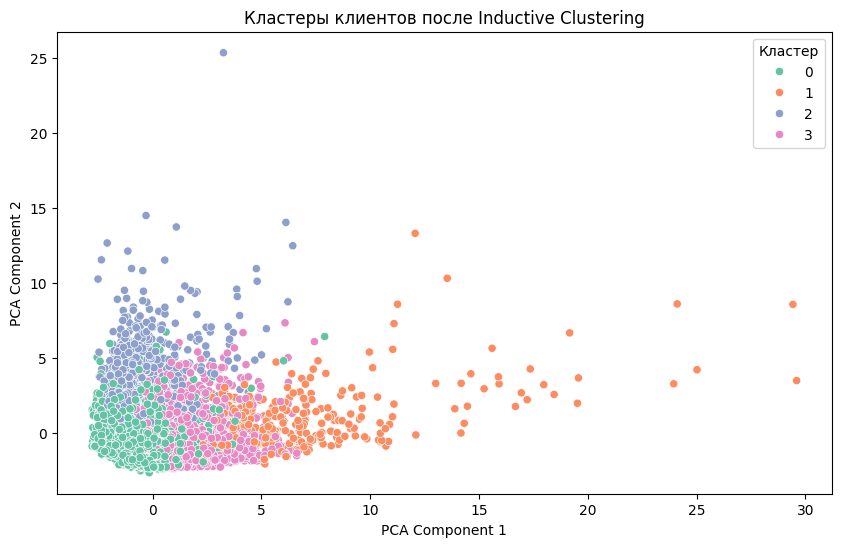

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, clone
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils.metaestimators import available_if
from sklearn.utils.validation import check_is_fitted
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

#  Загрузка данных через fetch_openml
data = fetch_openml(data_id=43618, as_frame=True)
df = data.frame

#  Предобработка данных

df.fillna(df.median(), inplace=True)

#  Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Кластеризация
clusterer = AgglomerativeClustering(n_clusters=4)
cluster_labels = clusterer.fit_predict(X_scaled)

#  Обучение классификатора
class InductiveClusterer(BaseEstimator):
    def __init__(self, clusterer, classifier):
        self.clusterer = clusterer
        self.classifier = classifier

    def fit(self, X, y=None):
        self.clusterer_ = clone(self.clusterer)
        self.classifier_ = clone(self.classifier)
        y = self.clusterer_.fit_predict(X)
        self.classifier_.fit(X, y)
        return self

    @available_if(lambda estimator: hasattr(estimator.classifier_, "predict"))
    def predict(self, X):
        check_is_fitted(self)
        return self.classifier_.predict(X)

classifier = RandomForestClassifier(random_state=42)
inductive_learner = InductiveClusterer(clusterer, classifier).fit(X_scaled)

#  Предсказание сегментов для новых клиентов
predicted_labels = inductive_learner.predict(X_scaled)

#  Визуализация результатов с помощью PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=predicted_labels, palette="Set2")
plt.title("Кластеры клиентов после Inductive Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Кластер")
plt.show()


**Датасет "Credit Card Dataset for Clustering" содержит информацию о поведении около 9000 держателей кредитных карт за последние 6 месяцев.**
**рассмотрим его поближе**

**Цель**:
Разделить клиентов на сегменты с помощью кластеризации и обучить классификатор для предсказания принадлежности новых клиентов к этим сегментам.

**Основные шаги реализации**
1. Загрузка и предобработка данных
2. Масштабирование признаков
3. Кластеризация с помощью AgglomerativeClustering
4. Обучение классификатора RandomForestClassifier
5. Предсказание сегментов для новых клиентов
6. Визуализация результатов
--------------------------------------

1. Импорт библиотек
   
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, clone
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils.metaestimators import available_if
from sklearn.utils.validation import check_is_fitted
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

2. Получение данных из OpenML

   
#Загрузка Credit Card Dataset for Clustering (data_id=43618)
data = fetch_openml(data_id=43618, as_frame=True)
df = data.frame

3. Предобработка и масштабирование данных
   
#Заполнение пропущенных значений
df.fillna(df.median(numeric_only=True), inplace=True)

#Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

4. Обучение кластеризатора + классификатора (Inductive Clustering)

#Кластеризация (Agglomerative)
clusterer = AgglomerativeClustering(n_clusters=4)

#Индуктивный обучаемый кластеризатор
class InductiveClusterer(BaseEstimator):
    def __init__(self, clusterer, classifier):
        self.clusterer = clusterer
        self.classifier = classifier

    def fit(self, X, y=None):
        self.clusterer_ = clone(self.clusterer)
        self.classifier_ = clone(self.classifier)
        y = self.clusterer_.fit_predict(X)
        self.classifier_.fit(X, y)
        return self

    @available_if(lambda estimator: hasattr(estimator.classifier_, "predict"))
    def predict(self, X):
        check_is_fitted(self)
        return self.classifier_.predict(X)

#Классификатор
classifier = RandomForestClassifier(random_state=42)
inductive_learner = InductiveClusterer(clusterer, classifier).fit(X_scaled)

#Предсказания сегментов (для демонстрации — на тех же данных)
predicted_labels = inductive_learner.predict(X_scaled)

5. Визуализация результатов с помощью PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=predicted_labels, palette="Set2")
plt.title("Кластеры клиентов после Inductive Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Кластер")
plt.show()

**Интерпретация результатов (реальный датасет)**

-Наблюдаемые эффекты:
Метод кластеризации выявляет группы клиентов, схожих по поведенческим метрикам (например, частота покупок, задолженности).
Индуктивное обучение позволяет впоследствии классифицировать новых клиентов на основе уже обученного представления.

-Практическая значимость:
Подобный анализ полезен для сегментации клиентов в финансовом секторе.
Сегментация может быть использована в целях таргетированного маркетинга, оценки риска или оптимизации обслуживания.